1. Data Preparation
2. Model Selection
3. Model Training
4. Model Evaluation
5. Hyperparameter Tuning


### 1. Data Preparation
* Data Cleaning: Handle missing values, remove duplicates, and correct errors.
* Feature Engineering: Create new features, transform variables, and encode categorical variables.
* Feature Selection: Select the most relevant features using techniques like correlation analysis, recursive feature elimination, etc.
* Data Splitting: Split the data into training, validation, and test sets (e.g., 70% training, 15% validation, 15% test).

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [24]:
df = pd.read_csv(r'C:\Users\Administrator\OneDrive\Desktop\Accident prediction\Datasets\processed\processed_data.csv')

In [25]:
df.head()

,time,day_of_week,age_band_of_driver,sex_of_driver,educational_level,vehicle_driver_relation,driving_experience,type_of_vehicle,owner_of_vehicle,service_year_of_vehicle,...,vehicle_movement,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,work_of_casuality,fitness_of_casuality,pedestrian_movement,cause_of_accident,accident_severity
0,2025-01-31 17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury
1,2025-01-31 17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
2,2025-01-31 17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
3,2025-01-31 01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,2025-01-31 01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,5-10yrs,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury


In [26]:
df.isnull().sum()

time                           0
day_of_week                    0
age_band_of_driver             0
sex_of_driver                  0
educational_level              0
vehicle_driver_relation        0
driving_experience             0
type_of_vehicle                0
owner_of_vehicle               0
service_year_of_vehicle        0
defect_of_vehicle              0
area_accident_occured          0
lanes_or_medians               0
road_allignment                0
types_of_junction              0
road_surface_type              0
road_surface_conditions        0
light_conditions               0
weather_conditions             0
type_of_collision              0
number_of_vehicles_involved    0
number_of_casualties           0
vehicle_movement               0
casualty_class                 0
sex_of_casualty                0
age_band_of_casualty           0
casualty_severity              0
work_of_casuality              0
fitness_of_casuality           0
pedestrian_movement            0
cause_of_a

In [27]:
lists=['vehicle_driver_relation', 'work_of_casuality', 'fitness_of_casuality','day_of_week','casualty_severity','time','sex_of_driver','educational_level','defect_of_vehicle','owner_of_vehicle','service_year_of_vehicle', 'road_surface_type','sex_of_casualty']
df.drop(columns = lists, inplace=True)

In [28]:
df.columns

Index(['age_band_of_driver', 'driving_experience', 'type_of_vehicle',
       'area_accident_occured', 'lanes_or_medians', 'road_allignment',
       'types_of_junction', 'road_surface_conditions', 'light_conditions',
       'weather_conditions', 'type_of_collision',
       'number_of_vehicles_involved', 'number_of_casualties',
       'vehicle_movement', 'casualty_class', 'age_band_of_casualty',
       'pedestrian_movement', 'cause_of_accident', 'accident_severity'],
      dtype='object')

In [29]:
X = df.drop('accident_severity', axis=1)
y = df['accident_severity']

In [30]:
X

,age_band_of_driver,driving_experience,type_of_vehicle,area_accident_occured,lanes_or_medians,road_allignment,types_of_junction,road_surface_conditions,light_conditions,weather_conditions,type_of_collision,number_of_vehicles_involved,number_of_casualties,vehicle_movement,casualty_class,age_band_of_casualty,pedestrian_movement,cause_of_accident
0,18-30,1-2yr,Automobile,Residential areas,Two-way (divided with broken lines road marking),Tangent road with flat terrain,No junction,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2.0,2.0,Going straight,na,na,Not a Pedestrian,Moving Backward
1,31-50,Above 10yr,Public (> 45 seats),Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Dry,Daylight,Normal,Vehicle with vehicle collision,2.0,2.0,Going straight,na,na,Not a Pedestrian,Overtaking
2,18-30,1-2yr,Lorry (41?100Q),Recreational areas,other,Tangent road with flat terrain,No junction,Dry,Daylight,Normal,Collision with roadside objects,2.0,2.0,Going straight,Driver or rider,31-50,Not a Pedestrian,Changing lane to the left
3,18-30,5-10yr,Public (> 45 seats),Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2.0,2.0,Going straight,Pedestrian,18-30,Not a Pedestrian,Changing lane to the right
4,18-30,2-5yr,Automobile,Industrial areas,other,Tangent road with flat terrain,Y Shape,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2.0,2.0,Going straight,na,na,Not a Pedestrian,Overtaking
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15200,31-50,5-10yr,Automobile,RecreatioNAl areas,Two-way (divided with broken lines road marking),Tangent road with flat terrain,Y Shape,Wet or damp,Darkness - no lighting,Raining,Vehicle with vehicle collision,2.0,1.0,Other,Driver or rider,na,Not a Pedestrian,Moving Backward
15201,31-50,2-5yr,Automobile,Office areas,other,Tangent road with flat terrain,Crossing,Dry,Daylight,Normal,Vehicle with vehicle collision,2.0,1.0,Going straight,Driver or rider,Over 51,Not a Pedestrian,No distancing
15202,Over 51,5-10yr,Bajaj,Outside rural areas,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,No junction,Dry,Daylight,Normal,Vehicle with vehicle collision,2.0,1.0,Other,Driver or rider,31-50,Not a Pedestrian,Changing lane to the right
15203,18-30,Above 10yr,Lorry (41?100Q),Office areas,Undivided Two way,Tangent road with mountainous terrain and,No junction,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2.0,1.0,Other,Driver or rider,na,Not a Pedestrian,Driving under the influence of drugs


In [31]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [32]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#categorical_features = df.select_dtypes(include=['object']).columns.tolist() #  categorical features
categorical_features = X.select_dtypes(include=['object']).columns
numeric_features = [col for col in X.columns if col not in categorical_features]

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))  # Replace LabelEncoder with OneHotEncoder
])

# Preprocessing for numerical data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Apply StandardScaler to numerical features
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Apply the preprocessor to your data
#X_train_scaled = preprocessor.fit_transform(X_train)
#X_test_scaled = preprocessor.transform(X_test)

### 1. Model Selection
1. Choose Models: Select a variety of models to train. Common choices include:
* Linear Models: Linear Regression, Logistic Regression.
* Tree-Based Models: Decision Trees, Random Forest, Gradient Boosting Machines (GBM), XGBoost, LightGBM, CatBoost.
* Support Vector Machines (SVM): SVR, SVC.
* Neural Networks: MLP, CNN, RNN.
* Ensemble Methods: Bagging, Boosting, Stacking.
* Clustering Models: K-Means, DBSCAN (for unsupervised learning).

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [34]:
models={
        "LogisticRegression":LogisticRegression(),
        "Decision Tree":DecisionTreeClassifier(),
        "SVM":SVC(),
        "KNN":KNeighborsClassifier(),
        "GNB":GaussianNB(),
        "Random Forest":RandomForestClassifier(),
        "AdaBoost":AdaBoostClassifier(),
        "Gradient Boosting":GradientBoostingClassifier(),
        }

### 3. Model Training

In [35]:
def model_classification_metrics(y_true, y_pred):
    # Ensure y_true and y_pred are discrete class labels (not probabilities)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    return accuracy, precision, recall, f1

In [40]:

def model_report(models, X_train,X_test, y_train, y_test):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    

    # Initialize lists to store results
    model_list = []
    accuracy_list = []
    precision_list = []
    recall_list = []
    f1_list = []


    for model_name, model in models.items():

        model_pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('model', model)
        ])
        # Train the model
        model_fit = model_pipeline.fit(X_train, y_train)

        # Get predictions
        y_train_pred = model_fit.predict(X_train)

        y_test_pred = model_fit.predict(X_test)


        # Calculate metrics using the predefined function
        model_accuracy, model_precision, model_recall, model_f1 = model_classification_metrics(y_test, y_test_pred)

        # Print training set performance
        print(f"{model_name}")
        print("Model performance for Training set")
        print("- Accuracy: {:.4f}".format(accuracy_score(y_train, y_train_pred)))
        print("- Precision: {:.4f}".format(precision_score(y_train, y_train_pred, average='weighted')))
        print("- Recall: {:.4f}".format(recall_score(y_train, y_train_pred, average='weighted')))
        print("- F1 Score: {:.4f}".format(f1_score(y_train, y_train_pred, average='weighted')))

        print('----------------------------------')

        # Print test set performance
        print("Model performance for Test set")
        print("- Accuracy: {:.4f}".format(model_accuracy))
        print("- Precision: {:.4f}".format(model_precision))
        print("- Recall: {:.4f}".format(model_recall))
        print("- F1 Score: {:.4f}".format(model_f1))

        # Append results to lists
        model_list.append(model_name)
        accuracy_list.append(model_accuracy)
        precision_list.append(model_precision)
        recall_list.append(model_recall)
        f1_list.append(model_f1)

        print('=' * 35)
        print('\n')

    # Create a DataFrame to store the results
    result_df = pd.DataFrame({
        'Model': model_list,
        'Accuracy': accuracy_list,
        'Precision': precision_list,
        'Recall': recall_list,
        'F1 Score': f1_list
    })

    return result_df

In [37]:
def bestModel(result):
    high=0
    for name,acc in result.items():
        if acc>high:
            high=acc
            model_name=name
    print("Best Model is ",model_name," with accuaracy =>",high)

In [41]:
acc=model_report(models, X_train_scaled,X_test_scaled, y_train, y_test)


c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


LogisticRegression
Model performance for Training set
- Accuracy: 0.8518
- Precision: 0.8561
- Recall: 0.8518
- F1 Score: 0.7846
----------------------------------
Model performance for Test set
- Accuracy: 0.8316
- Precision: 0.6916
- Recall: 0.8316
- F1 Score: 0.7552


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.7925
- Precision: 0.7809
- Recall: 0.7925
- F1 Score: 0.7863




c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM
Model performance for Training set
- Accuracy: 0.8532
- Precision: 0.8627
- Recall: 0.8532
- F1 Score: 0.7877
----------------------------------
Model performance for Test set
- Accuracy: 0.8323
- Precision: 0.8466
- Recall: 0.8323
- F1 Score: 0.7568


KNN
Model performance for Training set
- Accuracy: 0.8718
- Precision: 0.8563
- Recall: 0.8718
- F1 Score: 0.8409
----------------------------------
Model performance for Test set
- Accuracy: 0.8260
- Precision: 0.7632
- Recall: 0.8260
- F1 Score: 0.7705


GNB
Model performance for Training set
- Accuracy: 0.0801
- Precision: 0.8083
- Recall: 0.0801
- F1 Score: 0.1090
----------------------------------
Model performance for Test set
- Accuracy: 0.0756
- Precision: 0.7421
- Recall: 0.0756
- F1 Score: 0.1020


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8520
- Precision: 0.8721


c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost
Model performance for Training set
- Accuracy: 0.8502
- Precision: 0.8125
- Recall: 0.8502
- F1 Score: 0.7870
----------------------------------
Model performance for Test set
- Accuracy: 0.8306
- Precision: 0.7972
- Recall: 0.8306
- F1 Score: 0.7567


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8580
- Precision: 0.8659
- Recall: 0.8580
- F1 Score: 0.7998
----------------------------------
Model performance for Test set
- Accuracy: 0.8353
- Precision: 0.8112
- Recall: 0.8353
- F1 Score: 0.7663




### 4.Model Evaluation


In [19]:
def bestModel(result):
    high=0
    for name,acc in result.items():
        if acc>high:
            high=acc
            model_name=name
    print("Best Model is ",model_name," with accuaracy =>",high)

In [ ]:
bestModel(acc)

TypeError: '>' not supported between instances of 'str' and 'int'

### 5. Hypermparameter tuning

In [23]:
X = df.drop('accident_severity', axis=1)
y = df['accident_severity']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Create a ColumnTransformer for LabelEncoding to categorical features and StandardScaler to numerical features
 #  categorical features
categorical_features = [f for f in categorical_features if f in X_train.columns]
numeric_features = [col for col in df.columns if col not in categorical_features and col != 'accident_severity']

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))  # Replace LabelEncoder with OneHotEncoder
])
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Apply StandardScaler to numerical features
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Apply the preprocessor to your data
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [25,50],
    'criterion': ['gini', 'entropy','log_loss'],

     'max_features': ['sqrt', 'log2'],

}

In [27]:
model = RandomForestClassifier()
cv = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',  # Use 'accuracy' for classification
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available CPU cores
    verbose=2  # Print progress
)

In [28]:
cv.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [25, 50]},
             scoring='accuracy', verbose=2)

In [30]:
# Get the best parameters and best score
best_params = cv.best_params_
best_score = cv.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)

Best Parameters: {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 25}
Best Cross-Validation Accuracy: 0.8663269707097584


In [31]:
# Initialize the Random Forest model with the best parameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)

# Train the model
best_rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = best_rf_model.predict(X_test_scaled)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)



Test Set Accuracy: 0.8553107530417626


In [32]:
best_rf_model = cv.best_estimator_
best_rf_model


RandomForestClassifier(max_features='log2', n_estimators=25)

In [33]:
 best_rf_model.feature_importances_

array([3.59655850e-02, 2.99826413e-02, 1.75715291e-02, 1.86530669e-02,
       1.02542508e-02, 8.85416298e-03, 7.60093084e-03, 1.41366534e-02,
       1.78830671e-02, 1.99935968e-02, 1.53663586e-02, 1.24270037e-02,
       1.91117067e-03, 6.90258198e-04, 1.80564501e-02, 4.76637941e-04,
       3.92937062e-04, 5.15545125e-03, 7.31446719e-03, 1.16763549e-02,
       3.85758445e-03, 9.62519862e-03, 9.38512646e-03, 7.47535294e-03,
       7.62017881e-03, 4.86385549e-03, 9.84159358e-04, 2.12732808e-03,
       8.22864898e-03, 3.98975577e-03, 6.85695178e-04, 1.44429447e-03,
       7.87008823e-04, 3.16629956e-03, 8.78309558e-03, 1.62464463e-03,
       4.72476494e-03, 3.98980213e-03, 1.69702737e-02, 1.86439418e-02,
       1.05553067e-04, 1.26038856e-02, 5.28752169e-04, 7.14509219e-04,
       4.85276237e-03, 7.06312319e-04, 8.48703562e-03, 8.23092088e-03,
       2.27439033e-05, 1.84472578e-02, 3.17659278e-03, 1.83244028e-02,
       9.26042044e-04, 1.32384470e-02, 1.93566905e-03, 2.23903820e-03,
      

In [34]:
importances = best_rf_model.feature_importances_
# Get feature names after preprocessing
feature_names = preprocessor.get_feature_names_out()

feature_importances_df = pd.DataFrame({
    'Feature': feature_names,  # Use feature names after preprocessing
    'Importance': importances
})

In [35]:
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
feature_importances_df

,Feature,Importance
0,num__number_of_vehicles_involved,0.035966
1,num__number_of_casualties,0.029983
9,cat__driving_experience_5-10yr,0.019994
3,cat__age_band_of_driver_31-50,0.018653
39,cat__area_accident_occured_Other,0.018644
...,...,...
125,"cat__pedestrian_movement_In carriageway, stati...",0.000073
129,cat__pedestrian_movement_Walking along in carr...,0.000042
69,cat__types_of_junction_X Shape,0.000030
48,cat__lanes_or_medians_Other,0.000023


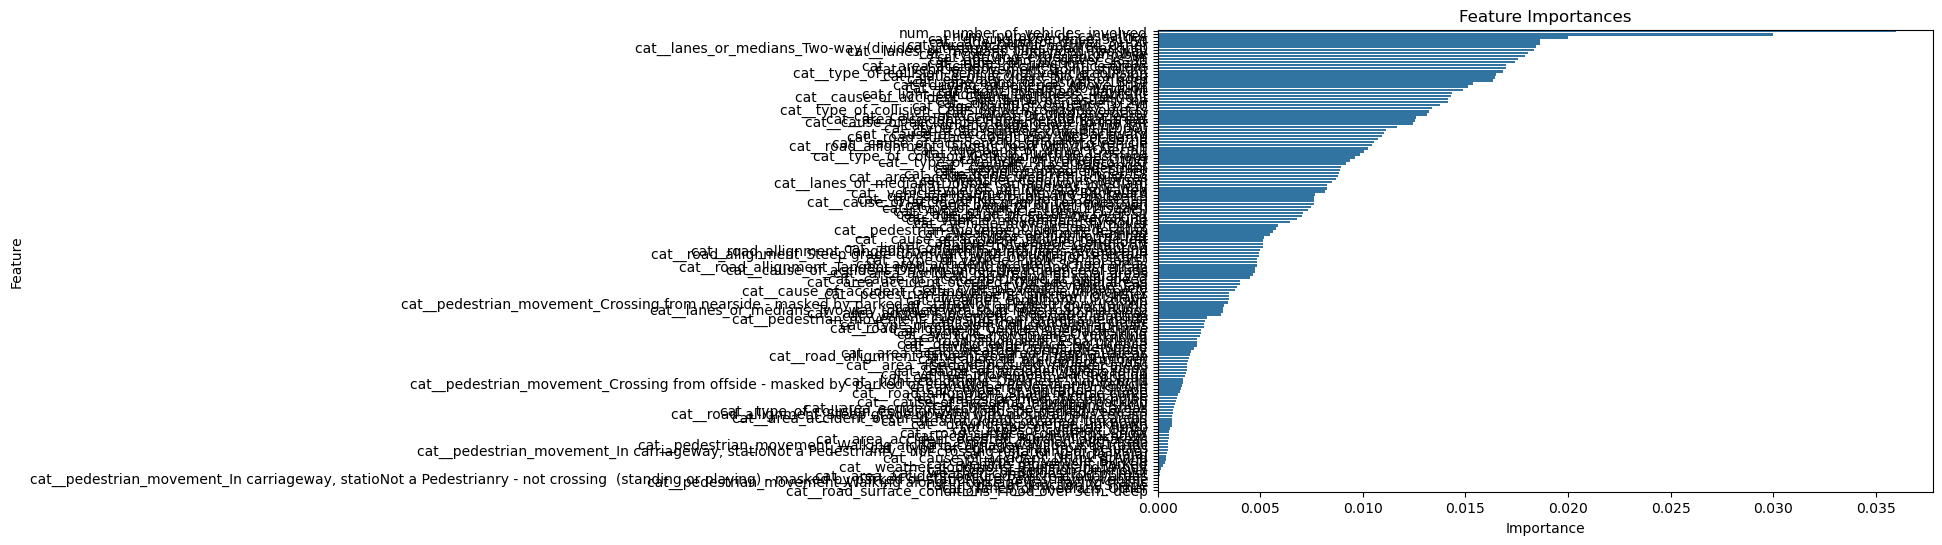

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importances')
plt.show()